In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
taxi_small = pd.read_csv("taxi-reduced-8434").drop('Unnamed: 0',axis = 1)
taxi_med = pd.read_csv("taxi-reduced-84394").drop('Unnamed: 0',axis = 1)
taxi_large = pd.read_csv("taxi-reduced-843984").drop('Unnamed: 0',axis = 1)

In [3]:
#read in key for taxi zones
taxi_zones = pd.read_csv("https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv")

In [13]:
#display zones to understand what it tells us
taxi_zones.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [14]:
taxi_zones["Zone"].value_counts()

Governor's Island/Ellis Island/Liberty Island    3
Corona                                           2
Jackson Heights                                  1
Union Sq                                         1
Morningside Heights                              1
                                                ..
Highbridge Park                                  1
Sunnyside                                        1
SoHo                                             1
Springfield Gardens South                        1
Randalls Island                                  1
Name: Zone, Length: 261, dtype: int64

In [5]:
#display taxi data for visual aid
taxi_med.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,winter,spring,summer,fall
0,2.0,2019-01-09 00:43:42,2019-01-09 00:52:16,1.0,1.81,1.0,N,142,229,1.0,...,0.5,2.45,0.0,0.3,12.25,NaN,1,0,0,0
1,1.0,2019-01-01 04:03:20,2019-01-01 04:18:54,1.0,4.30,1.0,N,140,202,1.0,...,0.5,3.25,0.0,0.3,19.55,NaN,1,0,0,0
2,2.0,2019-01-26 02:19:33,2019-01-26 02:25:37,1.0,1.56,1.0,N,164,68,1.0,...,0.5,1.00,0.0,0.3,9.30,0.0,1,0,0,0
3,1.0,2019-01-07 16:10:33,2019-01-07 16:26:20,1.0,0.80,1.0,N,170,230,2.0,...,0.5,0.00,0.0,0.3,12.30,NaN,1,0,0,0
4,1.0,2019-01-20 08:58:48,2019-01-20 09:04:30,1.0,0.50,1.0,N,65,65,1.0,...,0.5,1.25,0.0,0.3,7.55,NaN,1,0,0,0


In [6]:
#lets analyze location v cost

#which Pickup locations end up with the highest and lowest average cost
loc_cost_group = taxi_med.groupby('PULocationID').mean()['fare_amount']
loc_cost_group = loc_cost_group.sort_values()

print('Highest Average Cost:')
max_id = loc_cost_group.index[-1]
max_borough = taxi_zones[ taxi_zones['LocationID'] == max_id ].iloc[0,1]
max_zone= taxi_zones[ taxi_zones['LocationID'] == max_id ].iloc[0,2]
print('\t Zone:', max_zone)
print('\t Borough:', max_borough)
print('\t Cost:',loc_cost_group.max() )
print()

print('Lowest Average Cost:')
min_id = loc_cost_group.index[0]
min_borough = taxi_zones[ taxi_zones['LocationID'] == min_id ].iloc[0,1]
min_zone= taxi_zones[ taxi_zones['LocationID'] == min_id ].iloc[0,2]
print('\t Zone:', min_zone)
print('\t Borough:',min_borough)
print('\t Cost:',loc_cost_group.min())



Highest Average Cost:
	 Zone: Newark Airport
	 Borough: EWR
	 Cost: 104.75

Lowest Average Cost:
	 Zone: Prospect Park
	 Borough: Brooklyn
	 Cost: 2.5


In [7]:
taxi_med.groupby('PULocationID')['fare_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
PULocationID,,,,,,,,
1,8.0,104.750000,58.301556,20.0,88.750,97.50,104.500,230.00
3,1.0,13.500000,NaN,13.5,13.500,13.50,13.500,13.50
4,141.0,12.976950,8.233845,-3.0,8.000,11.00,16.000,52.00
7,127.0,11.911102,10.572925,-2.5,4.750,7.50,16.500,49.00
8,2.0,29.750000,31.466252,7.5,18.625,29.75,40.875,52.00
...,...,...,...,...,...,...,...,...
261,483.0,17.103561,12.023754,2.5,9.000,14.50,21.000,71.50
262,1104.0,10.160226,6.528599,-6.5,6.000,8.50,12.500,60.00
263,1560.0,9.733654,7.018809,-9.5,5.000,7.50,12.000,72.00


In [8]:
#compare to drop off location.
#see if values are different
#which drop off locations have the highest and lowest average cost
loc_cost_group = taxi_med.groupby('DOLocationID').mean()['fare_amount']
loc_cost_group = loc_cost_group.sort_values()

print('Highest Average Cost:')
max_id = loc_cost_group.index[-1]
max_borough = taxi_zones[ taxi_zones['LocationID'] == max_id ].iloc[0,1]
max_zone= taxi_zones[ taxi_zones['LocationID'] == max_id ].iloc[0,2]
print('\t Zone:', max_zone)
print('\t Borough:', max_borough)
print('\t Cost:',loc_cost_group.max() )
print()

print('Lowest Average Cost:')
min_id = loc_cost_group.index[0]
min_borough = taxi_zones[ taxi_zones['LocationID'] == min_id ].iloc[0,1]
min_zone= taxi_zones[ taxi_zones['LocationID'] == min_id ].iloc[0,2]
print('\t Zone:', min_zone)
print('\t Borough:',min_borough)
print('\t Cost:',loc_cost_group.min())


Highest Average Cost:
	 Zone: Rossville/Woodrow
	 Borough: Staten Island
	 Cost: 105.0

Lowest Average Cost:
	 Zone: Saint Michaels Cemetery/Woodside
	 Borough: Queens
	 Cost: 3.375


In [9]:
taxi_med.groupby('DOLocationID')['fare_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
DOLocationID,,,,,,,,
1,166.0,71.018072,21.795321,-77.5,64.1250,68.75,75.000,230.0
3,8.0,40.148750,10.223077,27.0,34.1425,37.25,44.250,59.5
4,347.0,10.979251,7.658686,-11.5,6.2500,9.50,13.000,52.0
6,1.0,39.000000,NaN,39.0,39.0000,39.00,39.000,39.0
7,333.0,17.407748,10.518832,-41.0,11.0000,16.00,22.500,53.0
...,...,...,...,...,...,...,...,...
261,382.0,17.670681,12.410479,2.5,8.6250,15.50,21.500,66.0
262,1105.0,10.808597,7.636159,0.0,6.0000,9.00,13.000,52.0
263,1542.0,10.276440,7.440437,-6.0,5.5000,8.00,13.000,52.0


In [10]:
print('min fare:', taxi_med['fare_amount'].min())
print('max fare:', taxi_med['fare_amount'].max())

#possible issue with having negative fare amounts. Something to look into. Maybe these are bas records.

min fare: -77.5
max fare: 425.0


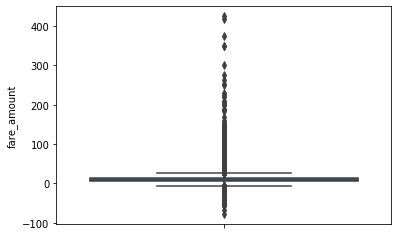

In [11]:
import seaborn as sns
sns.boxplot(y=taxi_med['fare_amount'])
#this shows some very clear outliers in our data. 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,winter,spring,summer,fall
26027,2.0,2019-04-02 12:39:52,2019-04-02 13:41:04,3.0,40.30,3.0,N,132,1,2.0,...,0.0,0.00,10.50,0.3,134.30,0.0,0,1,0,0
32862,2.0,2019-05-12 16:24:19,2019-05-12 17:38:14,4.0,41.95,5.0,N,132,265,1.0,...,0.0,10.00,24.74,0.3,460.04,0.0,0,1,0,0
37184,1.0,2019-05-09 11:42:50,2019-05-09 13:02:29,1.0,51.40,1.0,N,138,138,1.0,...,0.5,15.00,0.00,0.3,154.30,0.0,0,1,0,0
53291,2.0,2019-08-20 15:12:19,2019-08-20 17:24:43,1.0,95.29,1.0,N,132,265,1.0,...,0.5,50.56,0.00,0.3,303.36,0.0,0,0,1,0
68751,2.0,2019-10-12 00:24:38,2019-10-12 02:10:02,1.0,76.01,5.0,N,10,265,1.0,...,0.5,40.66,0.00,0.3,243.96,2.5,0,0,0,1
72142,2.0,2019-11-04 23:52:52,2019-11-05 00:38:42,2.0,40.50,5.0,N,132,265,1.0,...,0.5,9.00,6.12,0.3,200.92,0.0,0,0,0,1
74900,1.0,2019-11-09 15:31:58,2019-11-09 17:29:44,1.0,93.60,5.0,N,132,265,1.0,...,0.0,5.00,30.54,0.3,310.84,0.0,0,0,0,1
79683,2.0,2019-12-17 13:48:49,2019-12-17 15:26:43,1.0,42.14,5.0,N,132,265,1.0,...,0.0,27.00,16.62,0.3,201.92,0.0,1,0,0,0
80668,2.0,2019-12-14 22:07:57,2019-12-15 00:24:01,1.0,91.41,4.0,N,114,265,2.0,...,0.5,0.00,10.50,0.3,277.80,2.5,1,0,0,0


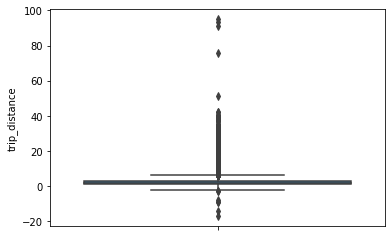

In [48]:
sns.boxplot(y = taxi_med['trip_distance'])


taxi_med[ taxi_med['trip_distance'] > 40]
#we have only 9 instances where the trip was more than 40 miles


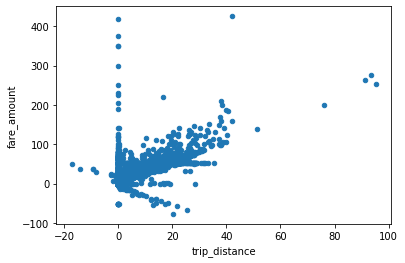

In [49]:
taxi_med.plot.scatter(x='trip_distance', y='fare_amount')

' this scatter plot isnt the most usefull however it does show us that we have several of our fate outliers \nin the same zone. '

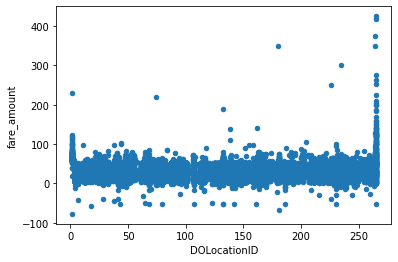

In [12]:
'''we can see with teh scatter plot that some rides with a distance of 0 miles had positive fares. 
We need to clean up these.
Otherwise, there is an overall correlation between distance and fare showing that distance is a fare predictor
'''

#show DO location with fare
taxi_med.plot.scatter(x='DOLocationID', y='fare_amount')
''' this scatter plot isnt the most usefull however it does show us that we have several of our fate outliers 
in the same zone. '''

The "shape file" found here contains some information about the zones.

Somehow, uploading all of them to this site out puts a csv with latitudes and longitudes 

https://mygeodata.cloud/

Uses coordinate system: EPSG:4269

Credit to this person, that did this project before us: https://chih-ling-hsu.github.io/2018/05/14/NYC

In [17]:
zones_latlong = pd.read_csv("taxi_zones-latlong.csv")

In [25]:
zones_latlong.head()

,X,Y,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,9.352230e+05,190535.0526,1,0.116357,0.000782,Newark Airport,1,EWR
1,1.032516e+06,167292.4932,2,0.433470,0.004866,Jamaica Bay,2,Queens
2,1.025883e+06,254779.6006,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx
3,9.906188e+05,203105.5323,4,0.043567,0.000112,Alphabet City,4,Manhattan
4,9.314680e+05,139837.4784,5,0.092146,0.000498,Arden Heights,5,Staten Island


### Join the lat/ long for each zone, dropping unneccessary columns 

In [70]:
lat_long_fare = taxi_large.join(other = zones_latlong.set_index("LocationID")[["X","Y"]], on = "PULocationID", how ="left")[["X","Y","fare_amount"]]
lat_long_fare.rename({"X":"Latitude", "Y": "Longitude"}, axis = 1, inplace = True)

In [72]:
lat_long_fare.head()

,Latitude,Longitude,fare_amount
0,1.010930e+06,211369.8834,6.5
1,9.968350e+05,218174.7900,7.0
2,9.919669e+05,215006.4597,14.5
3,9.961663e+05,223633.8650,5.5
4,9.822611e+05,203550.7913,7.5


### This pivot table will have latitude on the Y axis and longitude on the X axis

In [73]:
pivot = lat_long_fare.pivot_table(values = "fare_amount", index = "Latitude", columns = "Longitude")
pivot

Longitude,131469.1414,133152.7858,139837.4784,142929.9855,149456.6732,149700.8641,150502.7459,150686.8185,151388.4311,152667.3989,...,257767.3374,258295.0956,258436.3238,258762.4175,258960.9358,260590.4019,261091.6499,265281.3527,266878.0340,267135.0299
Latitude,,,,,,,,,,,,,,,,,,,,,
9.204363e+05,22.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.314680e+05,NaN,NaN,64.583333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.321097e+05,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.352230e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.358990e+05,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.057297e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.057584e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.058662e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### There are a ton of Null values because some of the latitudes and longitude pairs are not valid pickup locations, so no one has ever been picked up there. Fill them with zeroes

In [74]:
pivot.fillna(0, inplace = True)

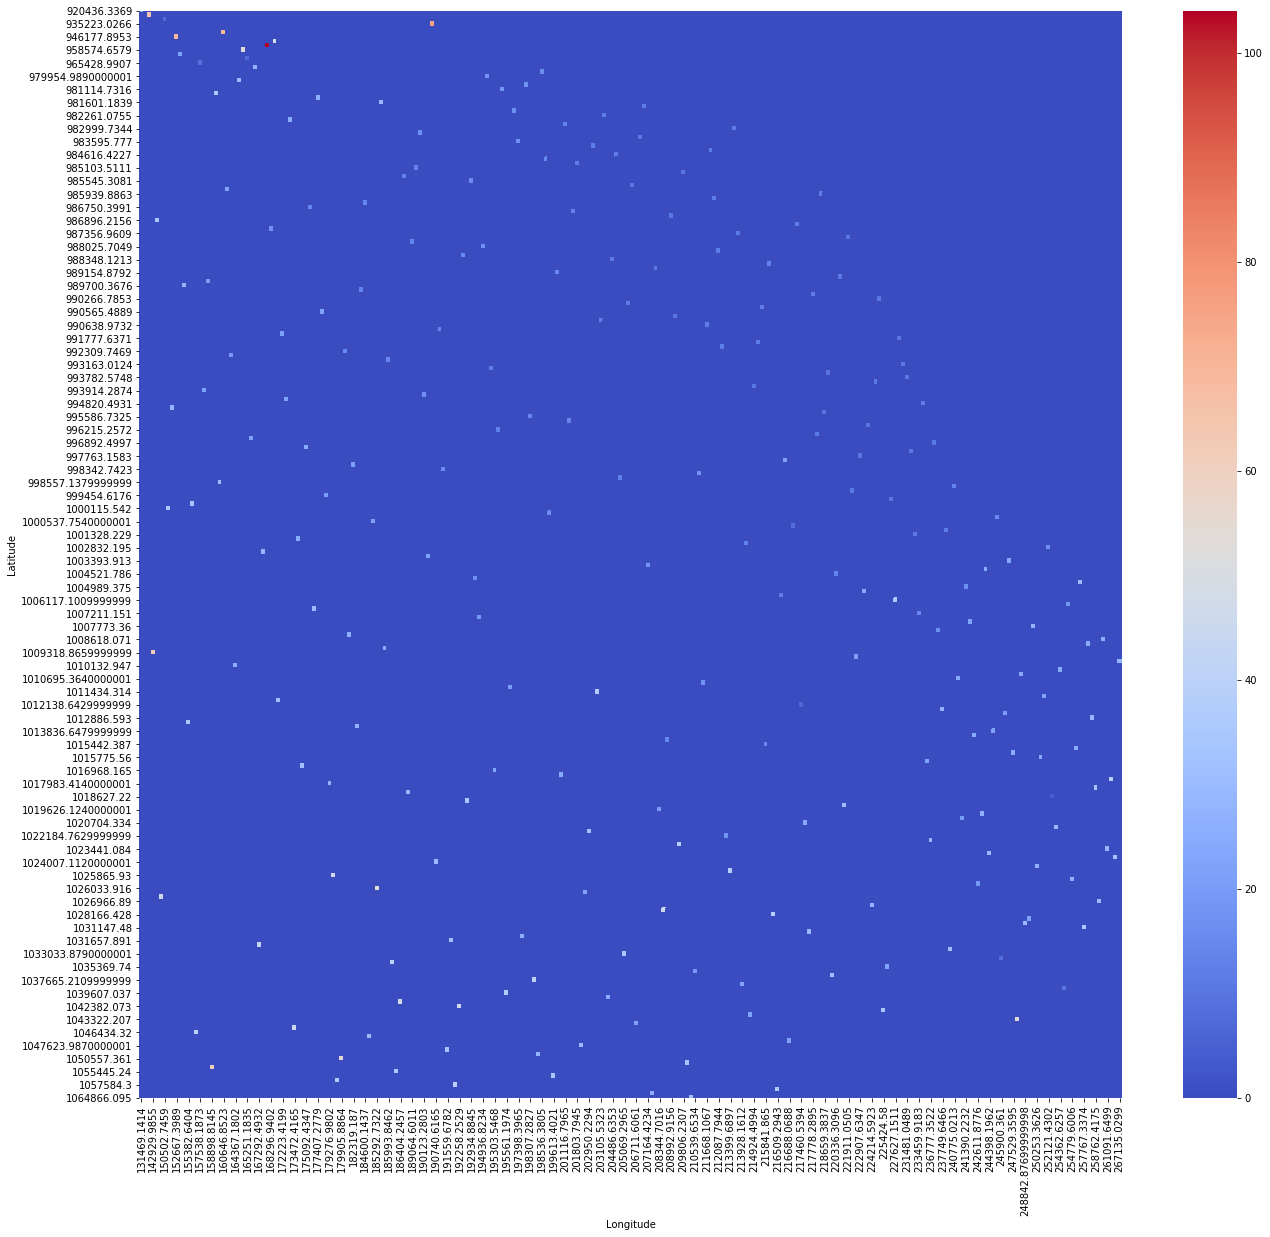

In [89]:
plt.figure(figsize=(22,20))
sns.heatmap(pivot, cmap="coolwarm")

### Look at average fare at each pickup latitude

In [105]:
lat_fare = lat_long_fare.groupby("Latitude").mean()["fare_amount"]
lat_fare.head()

Latitude
920436.3369    22.125000
931467.9628    64.583333
932109.6899     8.000000
935223.0266    75.466778
935899.0230     0.000000
Name: fare_amount, dtype: float64

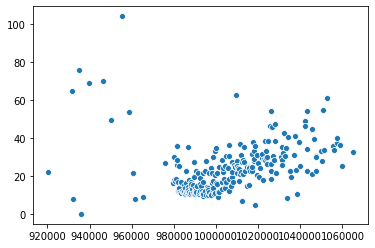

In [100]:
sns.scatterplot(data = lat_fare)

### Fit a linear regression to fare and latitude and plot the resulting line

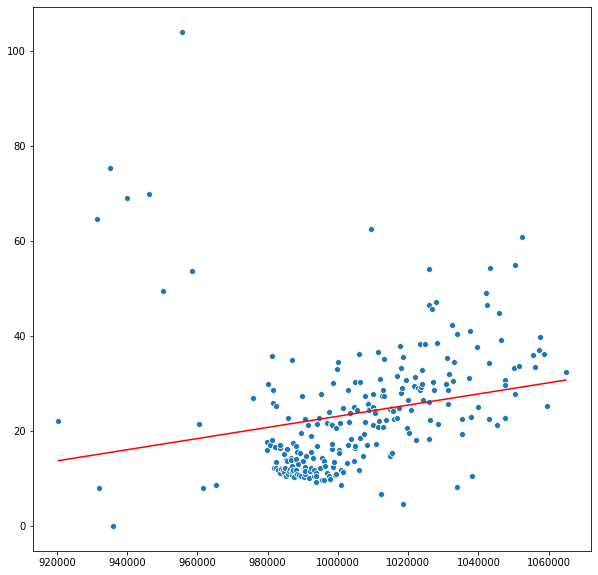

In [154]:
lf = pd.DataFrame(lat_fare).reset_index()

import numpy as np
X_lat = np.array(lf['Latitude']).reshape(-1, 1)
y_lat = np.array(lf['fare_amount']).reshape(-1, 1)

from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_lat, y_lat)

X_plot = np.linspace(X_lat.min(), X_lat.max(), 100)
Y_plot = lm.coef_*X_plot+lm.intercept_
plt.figure(figsize = (10,10))
sns.scatterplot(data = lat_fare)
plt.plot(X_plot,Y_plot[0], color = "red")

### Looks like there is a weak positive correlation between latitude and fare

## Do the same thing for longitude

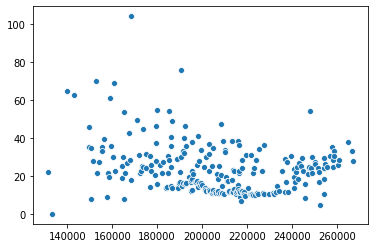

In [98]:
long_fare = lat_long_fare.groupby("Longitude").mean()["fare_amount"]
sns.scatterplot(data = long_fare)

## Looks like there is a weak negative correlation between Longitude and fare

### Fit another regression

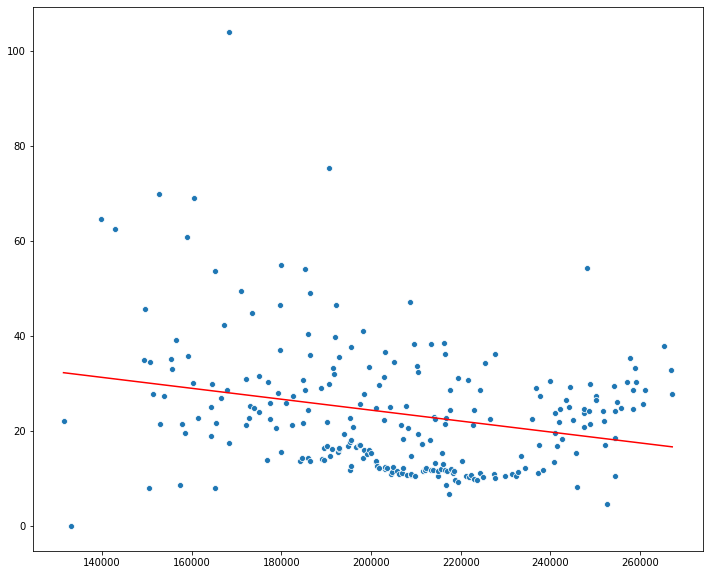

In [164]:
lf2 = pd.DataFrame(long_fare).reset_index()

X_lon = np.array(lf2['Longitude']).reshape(-1, 1)
y_lon = np.array(lf2['fare_amount']).reshape(-1, 1)

lm2 = LinearRegression().fit(X_lon, y_lon)

X_plot2 = np.linspace(X_lon.min(), X_lon.max(), 2)
Y_plot2 = lm2.coef_*X_plot2+lm2.intercept_
plt.figure(figsize = (12,10))
sns.scatterplot(data = long_fare)
plt.plot(X_plot2,Y_plot2[0], color = "red")